In [1]:
import torch
import data_s2s
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from r3m import load_r3m
r3m = load_r3m('resnet50').to('cuda:0')
r3m.eval()

/home/ademi_adeniji/anaconda3/envs/r3m_base/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ademi_adeniji/anaconda3/envs/r3m_base/lib/python3.9/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTrain

DataParallel(
  (module): R3M(
    (cs): CosineSimilarity()
    (bce): BCELoss()
    (sigm): Sigmoid()
    (convnet): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1

In [2]:
def show_images(batch: torch.Tensor, size=None):
    """ Display a batch of images inline. """
    scaled = ((batch + 1)*127.5).round().clamp(0,255).to(torch.uint8).cpu()
    reshaped = scaled.permute(2, 0, 3, 1).reshape([batch.shape[2], -1, 3])
    images = Image.fromarray(reshaped.numpy())
    if size is not None:
        images = images.resize(size, Image.NEAREST)
    display(images)

def show_images_bridge(batch: torch.Tensor, **kwargs):
    """ Display a batch of images inline. """
    if batch.ndim == 3:
        batch = batch.unsqueeze(0)
    batch = ((batch / 255) * 2) - 1 # [0, 256] to [-1, 1]
    show_images(batch, **kwargs)  

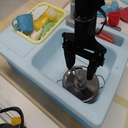

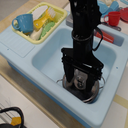

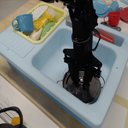

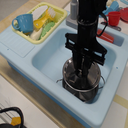

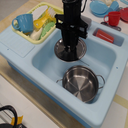

In [7]:
data_path = "/shared/ademi_adeniji/datasets/bridge_data_numpy_shifted_split_uint8/" \
"toysink3_bww/take_lid_off_pot_or_pan/train/out.npy"
video = np.load(data_path, allow_pickle=True)
for i in range(0,len(video[0]['observations']),5):
    frame = torch.from_numpy(video[0]['observations'][i]['images0'].reshape(3,128,128))
    show_images_bridge(frame)


Text(0.5, 1.0, 'r3m vid-lang alignment scores for take lid off pan')

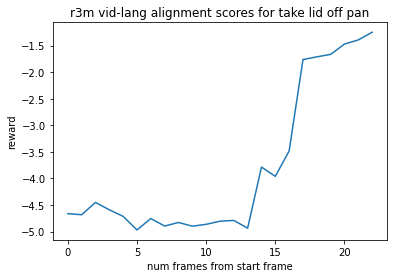

In [11]:
data_path = "/shared/ademi_adeniji/datasets/bridge_data_numpy_shifted_split_uint8/" \
"toysink3_bww/take_lid_off_pot_or_pan/train/out.npy"
video = np.load(data_path, allow_pickle=True)
start = torch.from_numpy(video[0]['observations'][0]['images0'].reshape(3,128,128)).unsqueeze(0).to('cuda:0') * 1.0
start = r3m(start)
lang = np.array(["take lid off pan"])
rewards = []
for i in range(len(video[0]['observations'])):
    end = torch.from_numpy(video[0]['observations'][i]['images0'].reshape(3,128,128)).unsqueeze(0).to('cuda:0') * 1.0
    end = r3m(end)
    rewards.append(r3m.module.get_reward(start, end, lang)[0].cpu().detach())
plt.plot(rewards)
plt.xlabel("num frames from start frame")
plt.ylabel("reward")
plt.title("r3m vid-lang alignment scores for " + lang[0])

# lang = np.array(["pick up spoon and put in on the plate"])
# rewards = []
# for i in range(len(video[0]['observations'])):
#     end = torch.from_numpy(video[0]['observations'][i]['images0'].reshape(3,128,128)).unsqueeze(0)
#     end = r3m(end)
#     rewards.append(r3m.module.get_reward(start, end, lang)[0].cpu().detach())
# plt.plot(rewards)

Text(0.5, 1.0, 'r3m vid-lang alignment scores for put lid on pan')

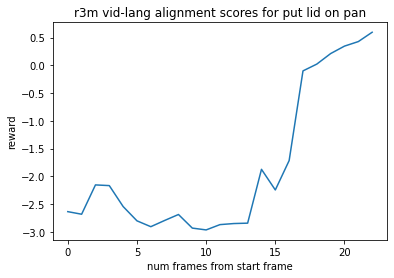

In [5]:
data_path = "/shared/ademi_adeniji/datasets/bridge_data_numpy_shifted_split_uint8/" \
"toysink3_bww/take_lid_off_pot_or_pan/train/out.npy"
video = np.load(data_path, allow_pickle=True)
start = torch.from_numpy(video[0]['observations'][0]['images0'].reshape(3,128,128)).unsqueeze(0).to('cuda:0') * 1.0
start = r3m(start)
lang = np.array(["put lid on pan"])
rewards = []
for i in range(len(video[0]['observations'])):
    end = torch.from_numpy(video[0]['observations'][i]['images0'].reshape(3,128,128)).unsqueeze(0).to('cuda:0') * 1.0
    end = r3m(end)
    rewards.append(r3m.module.get_reward(start, end, lang)[0].cpu().detach())
plt.plot(rewards)
plt.xlabel("num frames from start frame")
plt.ylabel("reward")
plt.title("r3m vid-lang alignment scores for " + lang[0])

Text(0.5, 1.0, 'r3m vid-lang alignment scores for take lid off trashcan')

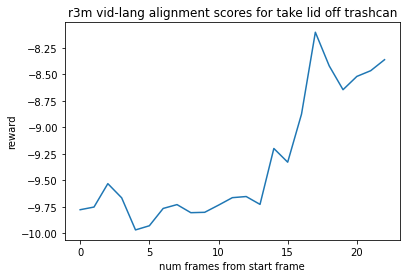

In [15]:
data_path = "/shared/ademi_adeniji/datasets/bridge_data_numpy_shifted_split_uint8/" \
"toysink3_bww/take_lid_off_pot_or_pan/train/out.npy"
video = np.load(data_path, allow_pickle=True)
start = torch.from_numpy(video[0]['observations'][0]['images0'].reshape(3,128,128)).unsqueeze(0).to('cuda:0') * 1.0
start = r3m(start)
lang = np.array(["take lid off trashcan"])
rewards = []
for i in range(len(video[0]['observations'])):
    end = torch.from_numpy(video[0]['observations'][i]['images0'].reshape(3,128,128)).unsqueeze(0).to('cuda:0') * 1.0
    end = r3m(end)
    rewards.append(r3m.module.get_reward(start, end, lang)[0].cpu().detach())
plt.plot(rewards)
plt.xlabel("num frames from start frame")
plt.ylabel("reward")
plt.title("r3m vid-lang alignment scores for " + lang[0])

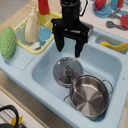

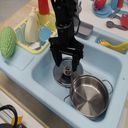

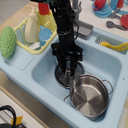

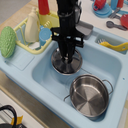

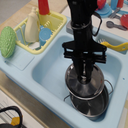

In [16]:
data_path = "/shared/ademi_adeniji/datasets/bridge_data_numpy_shifted_split_uint8/" \
"toysink3_bww/put_lid_on_pot_or_pan/train/out.npy"
video = np.load(data_path, allow_pickle=True)
for i in range(0,len(video[0]['observations']),5):
    frame = torch.from_numpy(video[0]['observations'][i]['images0'].reshape(3,128,128))
    show_images_bridge(frame)


Text(0.5, 1.0, 'r3m vid-lang alignment scores for put lid on pan')

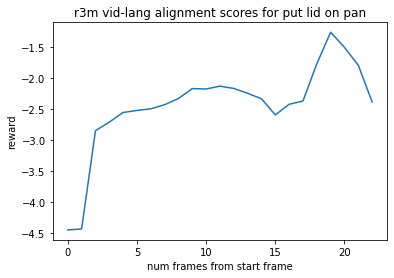

In [17]:
data_path = "/shared/ademi_adeniji/datasets/bridge_data_numpy_shifted_split_uint8/" \
"toysink3_bww/put_lid_on_pot_or_pan/train/out.npy"
video = np.load(data_path, allow_pickle=True)
start = torch.from_numpy(video[0]['observations'][0]['images0'].reshape(3,128,128)).unsqueeze(0).to('cuda:0') * 1.0
start = r3m(start)
lang = np.array(["put lid on pan"])
rewards = []
for i in range(len(video[0]['observations'])):
    end = torch.from_numpy(video[0]['observations'][i]['images0'].reshape(3,128,128)).unsqueeze(0).to('cuda:0') * 1.0
    end = r3m(end)
    rewards.append(r3m.module.get_reward(start, end, lang)[0].cpu().detach())
plt.plot(rewards)
plt.xlabel("num frames from start frame")
plt.ylabel("reward")
plt.title("r3m vid-lang alignment scores for " + lang[0])

Text(0.5, 1.0, 'r3m vid-lang alignment scores for take lid off pan')

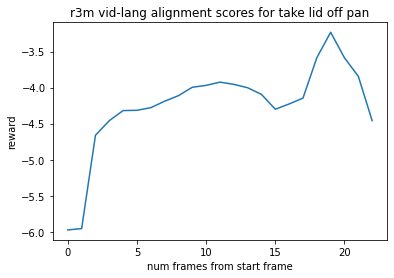

In [18]:
data_path = "/shared/ademi_adeniji/datasets/bridge_data_numpy_shifted_split_uint8/" \
"toysink3_bww/put_lid_on_pot_or_pan/train/out.npy"
video = np.load(data_path, allow_pickle=True)
start = torch.from_numpy(video[0]['observations'][0]['images0'].reshape(3,128,128)).unsqueeze(0).to('cuda:0') * 1.0
start = r3m(start)
lang = np.array(["take lid off pan"])
rewards = []
for i in range(len(video[0]['observations'])):
    end = torch.from_numpy(video[0]['observations'][i]['images0'].reshape(3,128,128)).unsqueeze(0).to('cuda:0') * 1.0
    end = r3m(end)
    rewards.append(r3m.module.get_reward(start, end, lang)[0].cpu().detach())
plt.plot(rewards)
plt.xlabel("num frames from start frame")
plt.ylabel("reward")
plt.title("r3m vid-lang alignment scores for " + lang[0])

Text(0.5, 1.0, 'r3m vid-lang alignment scores for put lid on trashcan')

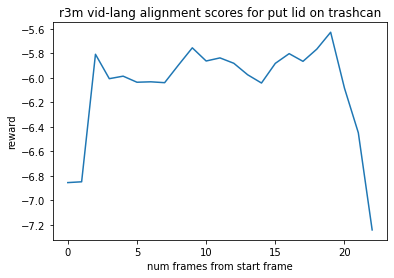

In [19]:
data_path = "/shared/ademi_adeniji/datasets/bridge_data_numpy_shifted_split_uint8/" \
"toysink3_bww/put_lid_on_pot_or_pan/train/out.npy"
video = np.load(data_path, allow_pickle=True)
start = torch.from_numpy(video[0]['observations'][0]['images0'].reshape(3,128,128)).unsqueeze(0).to('cuda:0') * 1.0
start = r3m(start)
lang = np.array(["put lid on trashcan"])
rewards = []
for i in range(len(video[0]['observations'])):
    end = torch.from_numpy(video[0]['observations'][i]['images0'].reshape(3,128,128)).unsqueeze(0).to('cuda:0') * 1.0
    end = r3m(end)
    rewards.append(r3m.module.get_reward(start, end, lang)[0].cpu().detach())
plt.plot(rewards)
plt.xlabel("num frames from start frame")
plt.ylabel("reward")
plt.title("r3m vid-lang alignment scores for " + lang[0])